# Stock Market Analysis for Tech Stocks

In this project, we'll analyse data from the stock market for some technology stocks. 

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history. 

Here are the questions we'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behaviour?

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [9]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,99.247498,96.489998,98.989998,97.724998,153198000.0,97.070930
2020-07-16,97.404999,95.904999,96.562500,96.522499,110577600.0,95.876472
2020-07-17,97.147499,95.839996,96.987503,96.327499,92186800.0,95.682777
2020-07-20,98.500000,96.062500,96.417503,98.357498,90318000.0,97.699188
2020-07-21,99.250000,96.742500,99.172501,97.000000,103433200.0,96.350784


In [11]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,125.069279,121.997123,123.617609,123.577401,1.186023e+08,123.236578
std,10.610154,10.696914,10.674312,10.672582,5.324663e+07,10.806773
min,92.970001,89.144997,90.987503,92.614998,4.669130e+07,91.995125
25%,118.769997,115.610001,117.180000,116.589996,8.346670e+07,116.162689
50%,125.860001,122.860001,124.529999,124.760002,1.036256e+08,124.397202
75%,132.490005,129.470001,131.190002,131.240005,1.433019e+08,130.755875
max,150.000000,147.762207,149.240005,149.149994,3.743368e+08,149.149994


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [12]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-15 to 2021-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


No missing info in the dataframe above, so we can go about our business.

### What's the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

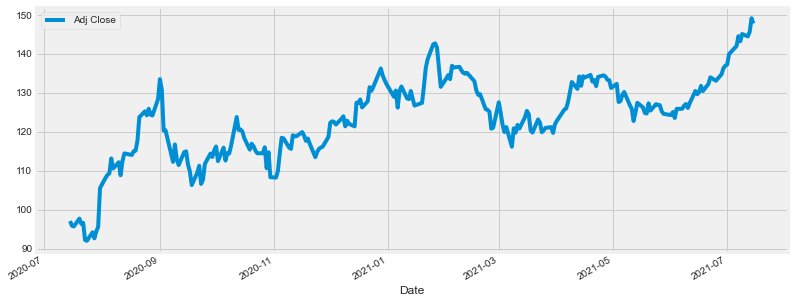

In [13]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

<AxesSubplot:xlabel='Date'>

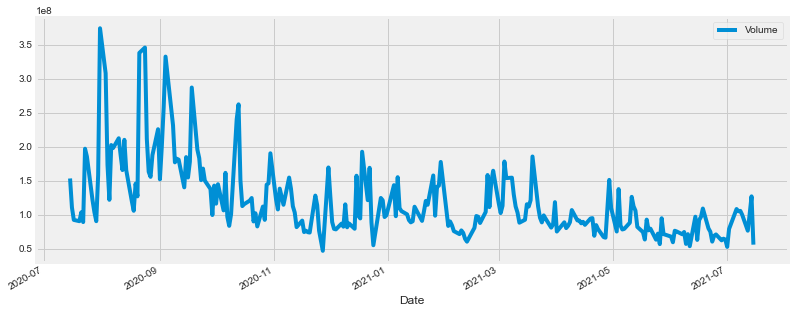

In [14]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [15]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [16]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-07-09,145.649994,142.649994,142.750000,145.110001,99788400.0,145.110001,139.335004,135.330501,130.211040
2021-07-12,146.320007,144.000000,146.210007,144.500000,76299700.0,144.500000,140.474004,136.188001,130.435967
2021-07-13,147.460007,143.630005,144.029999,145.639999,100698900.0,145.639999,141.560004,136.946001,130.724025
2021-07-14,149.570007,147.679993,148.100006,149.149994,126871000.0,149.149994,142.842003,137.921501,131.060720
2021-07-15,150.000000,147.762207,149.240005,147.800003,55760727.0,147.800003,143.926003,138.804002,131.464056


<AxesSubplot:xlabel='Date'>

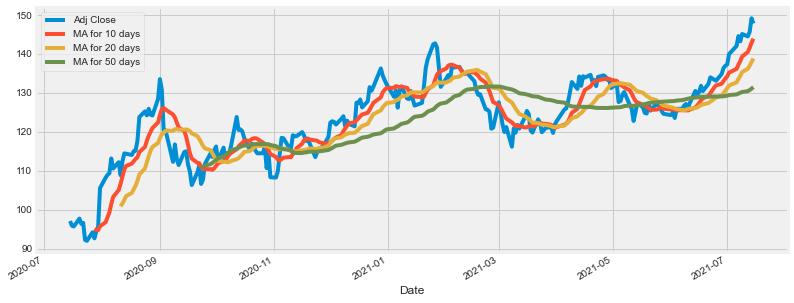

In [17]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### What was the daily return average of a stock?

In [18]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [19]:
AAPL['Daily Return'].tail()

Date
2021-07-09    0.013055
2021-07-12   -0.004204
2021-07-13    0.007889
2021-07-14    0.024100
2021-07-15   -0.009051
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

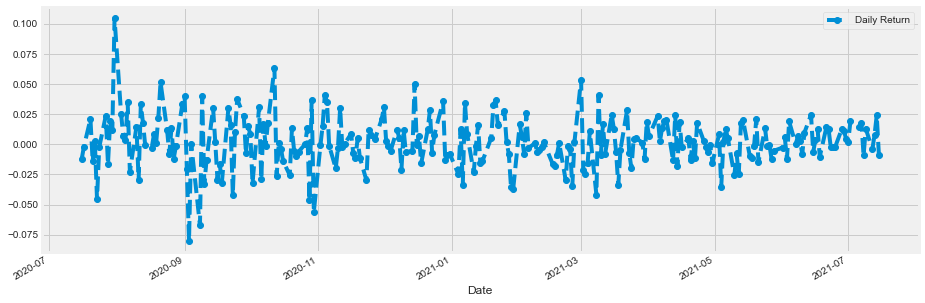

In [20]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

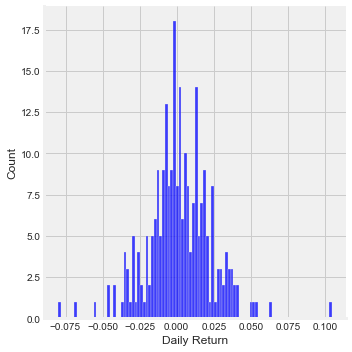

In [43]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [46]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [47]:
close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-09,145.110001,2591.489990,277.940002,3719.340088
2021-07-12,144.500000,2611.280029,277.320007,3718.550049
2021-07-13,145.639999,2619.889893,280.980011,3677.360107
2021-07-14,149.149994,2641.649902,282.510010,3681.679932
2021-07-15,148.009995,2626.284912,281.880005,3645.340088


Everything works as expected. 

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [48]:
rets_df = close_df.pct_change()

In [49]:
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-09,0.013055,0.003077,0.001874,-0.003235
2021-07-12,-0.004204,0.007637,-0.002231,-0.000212
2021-07-13,0.007889,0.003297,0.013198,-0.011077
2021-07-14,0.024100,0.008306,0.005445,0.001175
2021-07-15,-0.007643,-0.005816,-0.002230,-0.009870


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

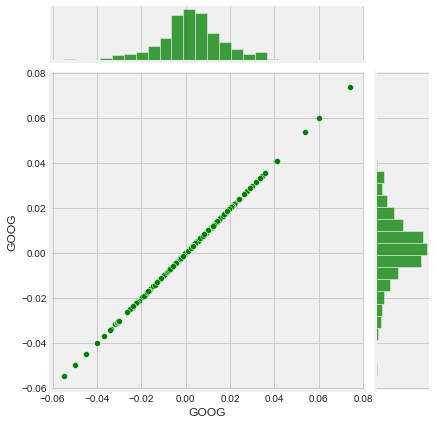

In [50]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

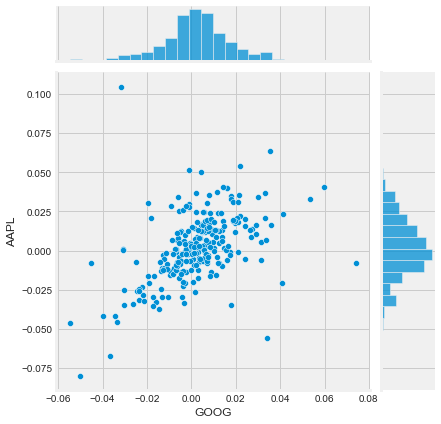

In [51]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

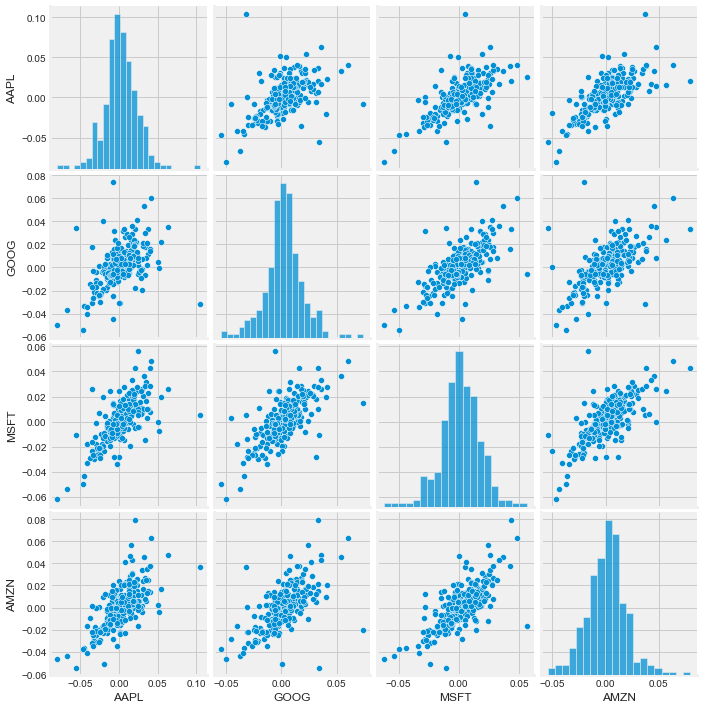

In [53]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

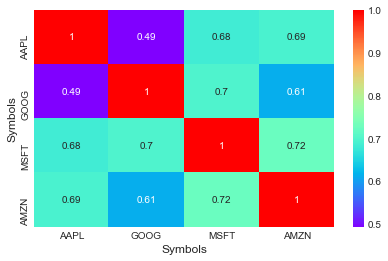

In [70]:
sns.heatmap(rets_df.corr(),annot=True, cmap='rainbow')

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

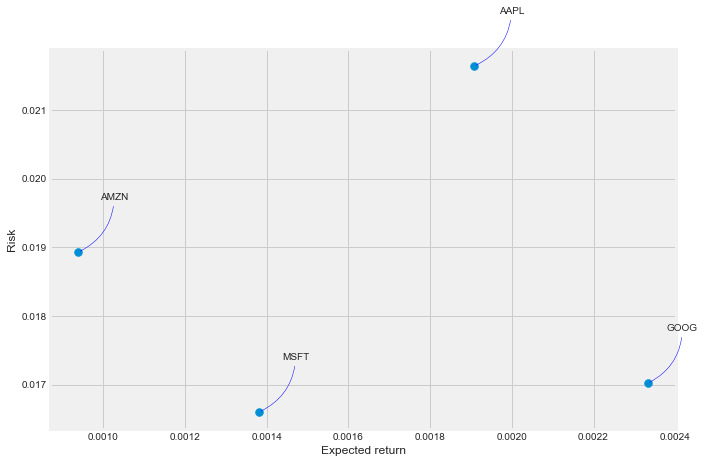

In [79]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

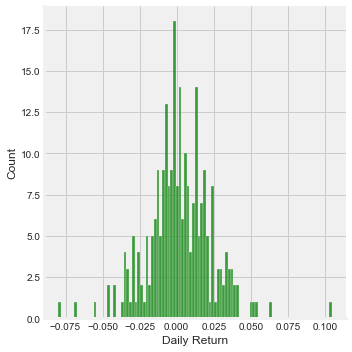

In [81]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='green')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [82]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-07-16,-0.012305,0.002880,-0.019804,-0.002981
2020-07-17,-0.002020,-0.001614,-0.005100,-0.012644
2020-07-20,0.021074,0.033103,0.042981,0.079295
2020-07-21,-0.013802,-0.004662,-0.013469,-0.018315
2020-07-22,0.002809,0.006462,0.014371,-0.012230


In [85]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.033102823024433924

The 0.05 empirical quantile of daily returns is at -0.021. This means that with 95% confidence, the worst daily loss will not exceed 3.31% (of the investment).

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

Check out this [link](http://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.


In [86]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [92]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [93]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,1535.329956,1498.000000,1523.130005,1513.640015,1610700,1513.640015
2020-07-16,1518.689941,1486.310059,1500.000000,1518.000000,1519300,1518.000000
2020-07-17,1523.439941,1498.420044,1521.619995,1515.550049,1456700,1515.550049
2020-07-20,1570.290039,1503.599976,1515.260010,1565.719971,1557300,1565.719971
2020-07-21,1586.989990,1554.280029,1586.989990,1558.420044,1216200,1558.420044


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

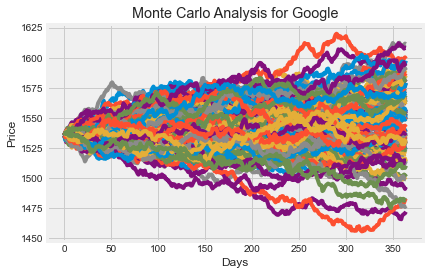

In [94]:
start_price = 1535.329 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [95]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

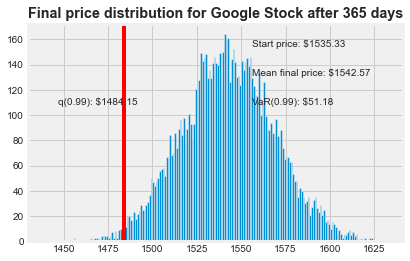

In [96]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD623.36.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.